In [62]:
import numpy as np
import random as Random
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
df = pd.read_excel(r"E:\My work\Sem 7\ML\ML-Class\End Sem\End sem Data.xlsx")
data = df.to_numpy()
np.random.shuffle(data)
Y = data[:,-1]
X = np.delete(data,-1,1)
X = X.astype(np.float64)
Y = Y.astype(np.float64)
#Separating into train/test (80-20)
sep = 0.8*len(X)-1
sep = int(sep)
trainx, testx = X[:sep,:], X[sep:,:]
trainy, testy = Y[:sep], Y[sep:]

In [ ]:
# GD from scratch
def GD_Batch(x,y, iter = 800, α = 0.01):
    wc = np.array([0]*len(X.columns))
    bc = 0
    I = np.array([0]*len(X.columns))
    n = len(x)
    for i in range(iter):
        for j in range(len(wc)):
            yp = (wc[j]*x)+(bc*I)
        wd = -(2/n)*sum(x*(y-yp))
        bd = -(2/n)*sum(y-yp)
        wc = wc-(α*wd)
        bc = bc-(α*bd)
        #print("m {}, b {}, iteration {}".format(mc,bc,i))
    return(wc,bc)

def SGD(x,y, iter = 800, α = 0.01):
    wc = bc = 0
    n = len(x)
    for i in range(iter):
        ya = np.random.choice(y)
        xa = x[y.index(ya)]
        yp = (wc*xa)+bc
        wd = -2*xa*(ya-yp)
        bd = -2*(ya-yp)
        wc = wc-(α*wd)
        bc = bc-(α*bd)
        #print("m {}, b {}, iteration {}".format(mc,bc,i))
    return(wc,bc)
    
    
# Mini Batch GD (mini batch size 20)
def minBatchGD(x,y, iter = 800, α = 0.01):
    wc = bc = 0
    n = len(x)
    bs = 3
    for i in range(iter):
        ya = Random.sample(y,k = bs)
        xa = np.zeros(bs)
        for i in range(bs):
            xa[i] = x[y.index(ya[i])]
        yp = (wc*xa)+bc
        wd = -(2/bs)*sum(xa*(ya-yp))
        bd = -(2/bs)*sum(ya-yp)
        wc = wc-(α*wd)
        bc = bc-(α*bd)
        #print("m {}, b {}, iteration {}".format(mc,bc,i))
    return(wc,bc)

In [64]:
# Applying linear regression
model = LinearRegression()
res = model.fit(trainx, trainy)


predy = res.predict(testx)

Coefficients: 
 [-1.27827783e-03 -4.05510640e-01 -3.50080410e+01  9.81010197e-02
 -1.54168196e+02]
Mean squared error: 26.31
Coefficient of determination: 0.50


In [ ]:
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(testy, predy))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(testy, predy))

302
(302,)


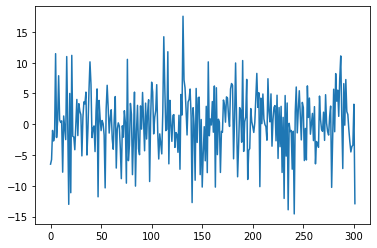

In [71]:
acc = predy-testy
l = len(predy)
plt.plot(np.arange(l), acc)
plt.show()

[128.15246683 131.87085413 121.33790599 119.71425848 120.8580144
 125.94957287 127.09399185 125.12252094 123.60847113 131.84694298]
